In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Datasets**

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**PreProcessing**

In [9]:
train.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [12]:
test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [11]:
test.fillna(test.mean(), inplace=True)

**EDA**

<Axes: >

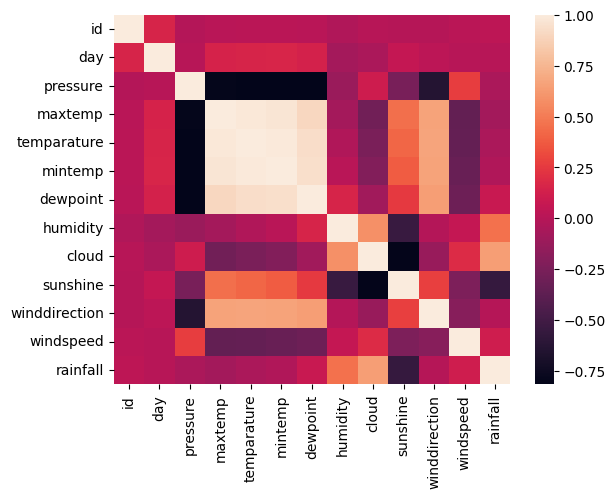

In [15]:
corr = train.corr()
sns.heatmap(corr)

**Model Training**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train.drop(columns = ['rainfall'], axis = 1)
y = train['rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(X_train, y_train)

pred = model1.predict(X_test)

In [21]:
predictions = model1.predict(test)

submission = pd.DataFrame({
    'id': test['id'],
    'rainfall': predictions
})

submission.to_csv('submission.csv', index = False)